In [1]:
# Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist, cifar10
import cv2

2022-12-14 15:47:37.165851: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 15:47:37.328589: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-14 15:47:37.328612: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-14 15:47:38.349879: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

## In this notebook, I will load in the image data from the cropped equation, classify the images with my trained CNN, and solve the equation

In [82]:
# Load in model here
filename = '../models/cnn_3layer64dropout.pkl'
model = pickle.load(open(filename, 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2022-12-13 22:04:10           64
variables.h5                                   2022-12-13 22:04:10       983824
config.json                                    2022-12-13 22:04:10         2670
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
...vars


In [72]:
# set equation directory path
eq_dir = '../image_data/image_output/'

### Load in Images and make predictions

In [73]:
# create seperated equation image data
def create_testing_data(eq_dir):
    img_data = []
    for file in sorted(os.listdir(eq_dir)):
        img_path = os.path.join(eq_dir, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (50, 50), interpolation = cv2.INTER_AREA)
        img = np.array(img)
        img = img.astype('float32')
        img_data.append(img)
    X_test = np.array(img_data, np.float32)
    X_test = X_test.reshape(-1, 50, 50, 1)
    return X_test

In [183]:
# Load in images and check shape
X_test = create_testing_data(eq_dir)
X_test.shape

In [185]:
# get predicted characters
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

1/1 [==============================] - 0s 46ms/step


array([11,  4, 12,  5])

### Convert output to a readable equation and solve

In [186]:
# convert prediction output to symbols
math_dict = {0: '+', 1: '-', 2: '0', 3: '1', 4: '2', 5: '3', 6: '4', 7: '5',
             8: '6', 9: '7', 10: '8', 11: '9', 12: '*'}

In [187]:
# create equation
equation = ''
for i in y_pred:
    equation += math_dict[i]
print(equation)

92*3


In [188]:
# Solve equation
print(f'{equation} = {eval(equation)}')

92*3 = 276


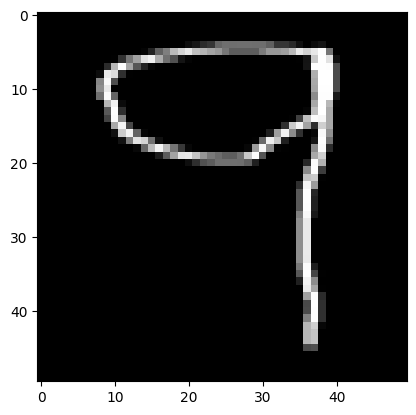

In [189]:
plt.imshow(X_test[0], cmap='binary');